---
# Proyecto 1 Mineria de Datos

### Integrantes:
Benjamin Cordero\
Jaime Torres\
Camila Retamales\
Jose Flores\
Joaquin Cortes


---


In [298]:
#Librerias
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from plotnine import*
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from pyclustertend import hopkins

CUSTID : Identification of Credit Card holder (Categorical)
<br>
<br>
BALANCE : Balance amount left in their account to make purchases (
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
<br>
<br>
PURCHASES : Amount of purchases made from account
<br>
<br>
ONEOFFPURCHASES : Maximum purchase amount done in one-go
<br>
<br>
INSTALLMENTSPURCHASES : Amount of purchase done in installment
<br>
<br>
CASHADVANCE : Cash in advance given by the user
<br>
<br>
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
<br>
<br>
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
<br>
<br>
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
<br>
<br>
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
<br>
<br>
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
<br>
<br>
PURCHASESTRX : Number of purchase transactions made
<br>
<br>
CREDITLIMIT : Limit of Credit Card for user
<br>
<br>
PAYMENTS : Amount of Payment done by user
<br>
<br>
MINIMUM_PAYMENTS : Minimum amount of payments made by user
<br>
<br>
PRCFULLPAYMENT : Percent of full payment paid by user
<br>
<br>
TENURE : Tenure of credit card service for user

In [299]:
#Base de Datos
#path
filepath = os.getcwd() + os.path.sep + "CC-GENERAL.csv"
df = pd.read_csv(filepath,delimiter=',')
display(df.head())
print(f"DataFrame de {df.shape[0]} filas y {df.shape[1]} columnas.")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


DataFrame de 8950 filas y 18 columnas.


## Analisis exploratorio de los datos

In [300]:
#Tipo de variable en cada columna y cantidad de valores no nulos NaN por columna
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [301]:
#Cantidad de valores atípicos NaN por columna
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [302]:
#El cliente con CREDIT_LIMIT NaN pareciera no sobresalir por sobre el resto de clientes, luego su valor puede ser imputado
#de acuerdo a algún valor.
df[df["CREDIT_LIMIT"].isna()==True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [303]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Se observa la diferencia considerable en la mayoría de las columnas entre la mediana y la media, lo que indica que los datos datos tienen una cierta skewness.

In [304]:
#Se tratan los valores NaN imputando la mediana de los datos, en respuesta a su skewness. 
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

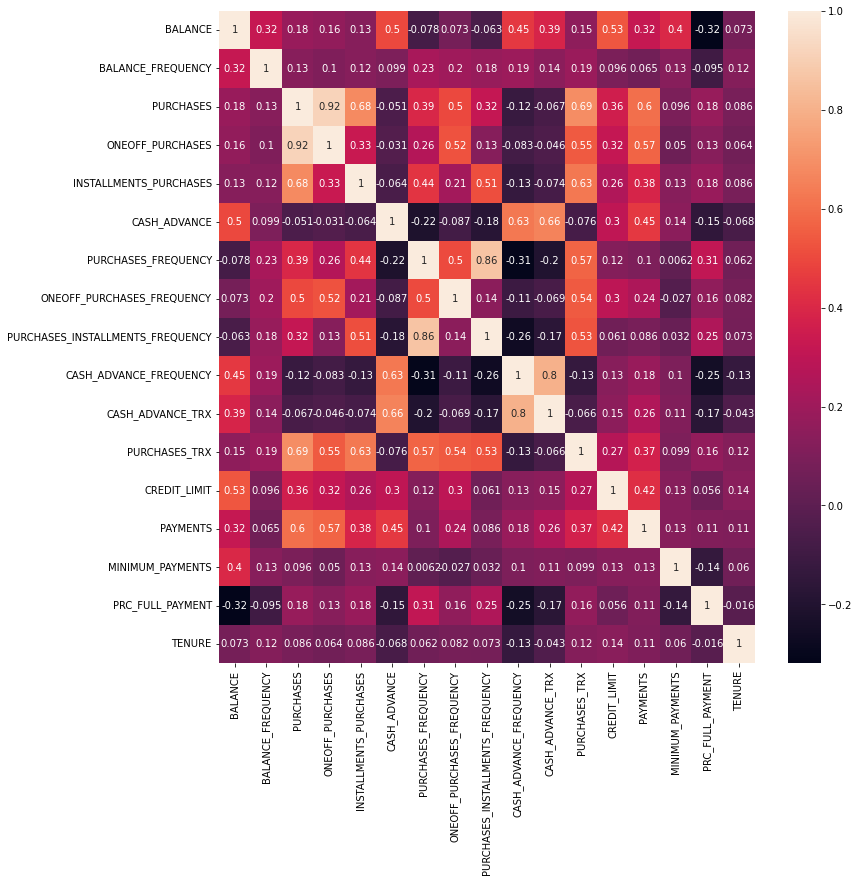

In [305]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Correlaciones a destacar: ONEOFF_PURCHASES - PURCHASES (0.92), PUCHASES_INSTALLMENTS_FREQUENCY - PURCHASES_FREQUENCY (0.86) y CASH_ADVANCE_TRX - CASH_ADVANCE_FREQUENCY (0.8) Es decir, ninguna contraintuitiva.

<AxesSubplot:xlabel='BALANCE'>

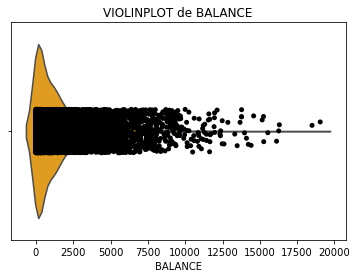

<AxesSubplot:xlabel='BALANCE_FREQUENCY'>

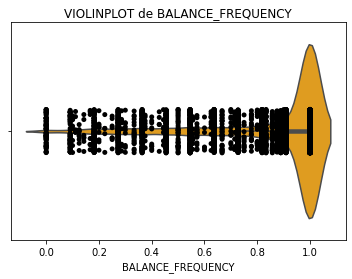

<AxesSubplot:xlabel='PURCHASES'>

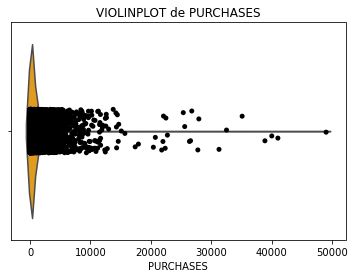

<AxesSubplot:xlabel='ONEOFF_PURCHASES'>

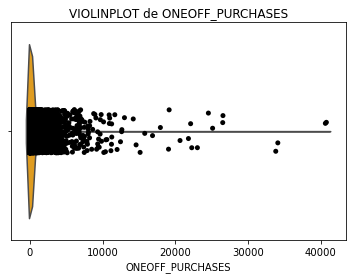

<AxesSubplot:xlabel='INSTALLMENTS_PURCHASES'>

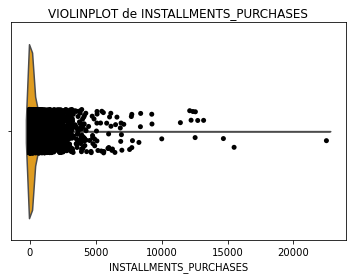

<AxesSubplot:xlabel='CASH_ADVANCE'>

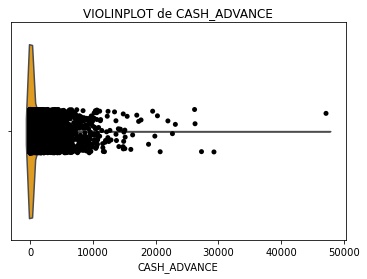

<AxesSubplot:xlabel='PURCHASES_FREQUENCY'>

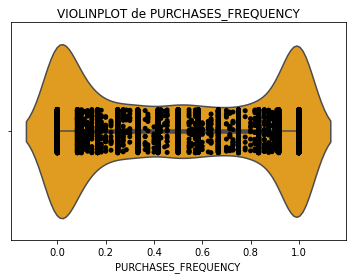

<AxesSubplot:xlabel='ONEOFF_PURCHASES_FREQUENCY'>

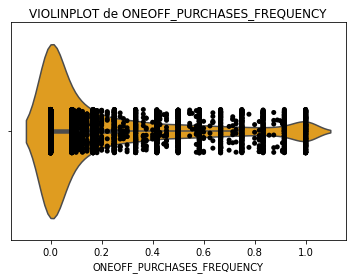

<AxesSubplot:xlabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

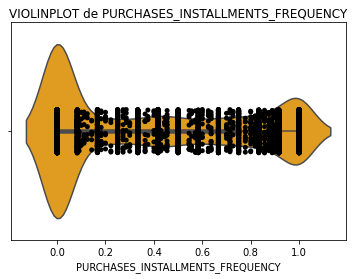

<AxesSubplot:xlabel='CASH_ADVANCE_FREQUENCY'>

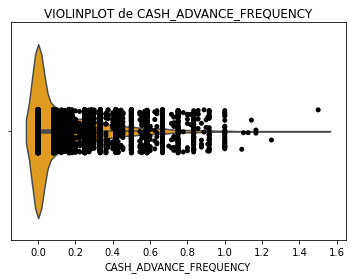

<AxesSubplot:xlabel='CASH_ADVANCE_TRX'>

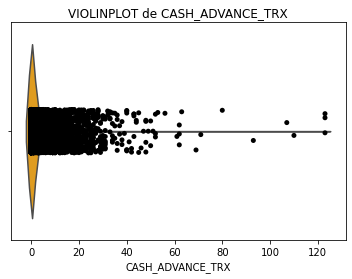

<AxesSubplot:xlabel='PURCHASES_TRX'>

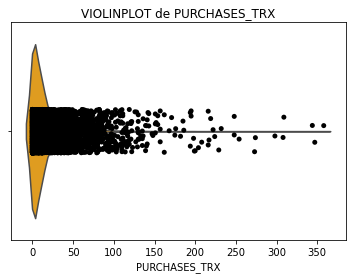

<AxesSubplot:xlabel='CREDIT_LIMIT'>

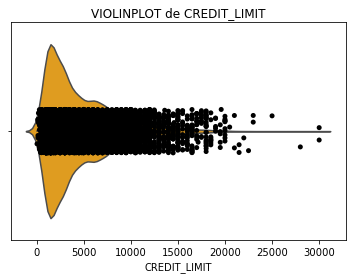

<AxesSubplot:xlabel='PAYMENTS'>

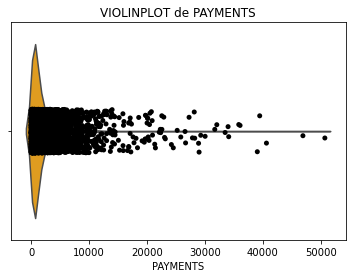

<AxesSubplot:xlabel='MINIMUM_PAYMENTS'>

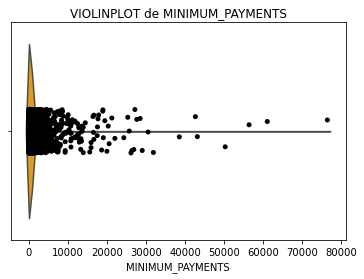

<AxesSubplot:xlabel='PRC_FULL_PAYMENT'>

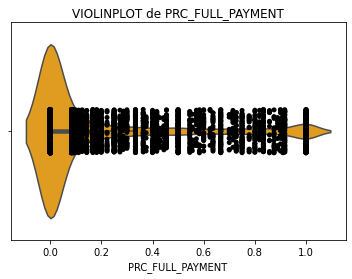

<AxesSubplot:xlabel='TENURE'>

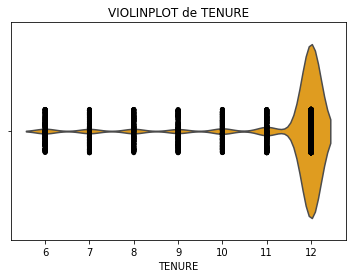

In [306]:
#Violinplot para cada columna
df.drop('CUST_ID', inplace=True, axis=1)
for i in df.columns:
    display(sns.violinplot(x=df[i],color='orange'))
    sns.stripplot(data=df, x=i,color = 'black')
    plt.title(f"VIOLINPLOT de {i}")
    plt.show()

### Análisis Outliers

Observando los graficos de violin podemos apreciar que existe outliers en los siguientes atributos: MINIMUM_PAYMENTS, PAYMENTS, CREDIT_LIMIT, PURCHASE_TRX, CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY, CASH_ADVANCE, INSTALLMENTS_PURCHASES, ONEOFF_PURCHASES, PURCHASES, BALANCE_FREQUENCY Y BALANCE. Hay datos que hacen que las curvas de densidad tengo una considerable skewness.

Por lo que utilizaremos el metodo de rango intercuartil para limpiar los datos. Se eliminarán todos los datos que tengan al menos una columna con un dato outlier. Esto puede llevar a que se elimine una cantidad considerable de la data. Se deja propuesta a merced del lector otra manera de determinar los outliers (por ejemplo, considerar un dato como outlier si tiene N columnas con valores outlier)

Nos queda un DataFrame con 4194 observaciones.


<AxesSubplot:xlabel='BALANCE'>

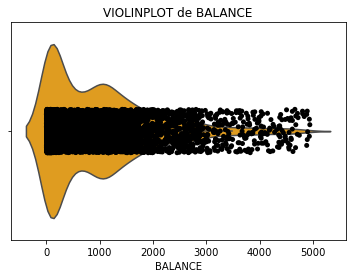

<AxesSubplot:xlabel='BALANCE_FREQUENCY'>

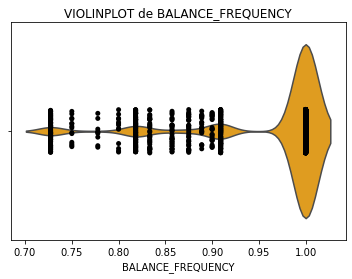

<AxesSubplot:xlabel='PURCHASES'>

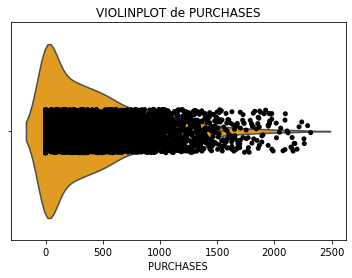

<AxesSubplot:xlabel='ONEOFF_PURCHASES'>

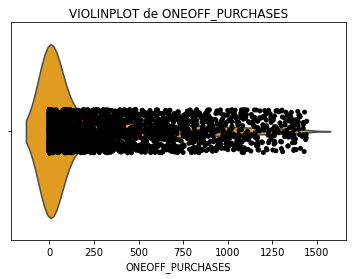

<AxesSubplot:xlabel='INSTALLMENTS_PURCHASES'>

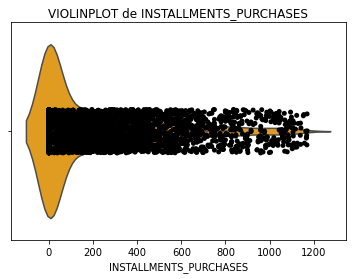

<AxesSubplot:xlabel='CASH_ADVANCE'>

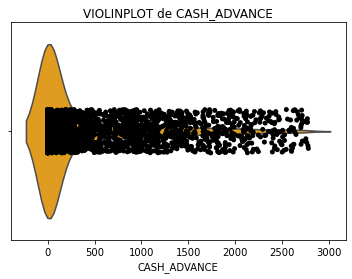

<AxesSubplot:xlabel='PURCHASES_FREQUENCY'>

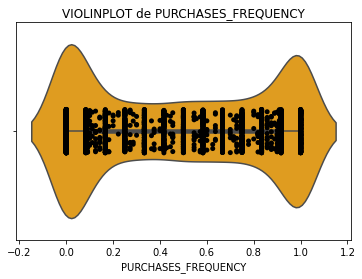

<AxesSubplot:xlabel='ONEOFF_PURCHASES_FREQUENCY'>

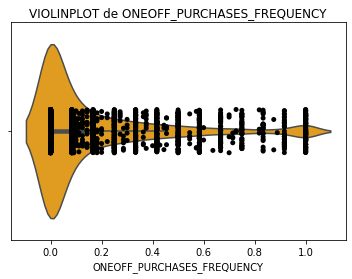

<AxesSubplot:xlabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

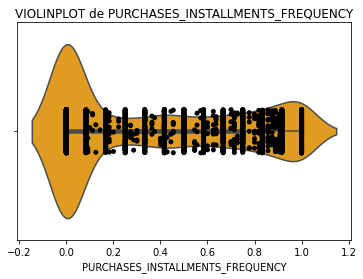

<AxesSubplot:xlabel='CASH_ADVANCE_FREQUENCY'>

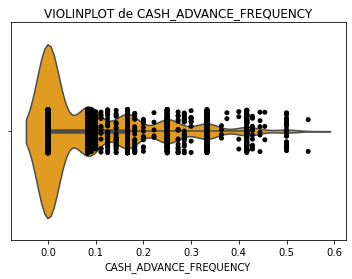

<AxesSubplot:xlabel='CASH_ADVANCE_TRX'>

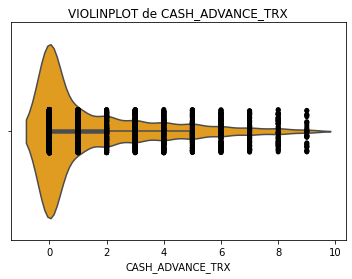

<AxesSubplot:xlabel='PURCHASES_TRX'>

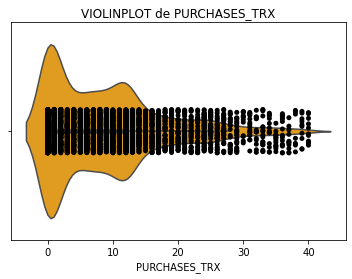

<AxesSubplot:xlabel='CREDIT_LIMIT'>

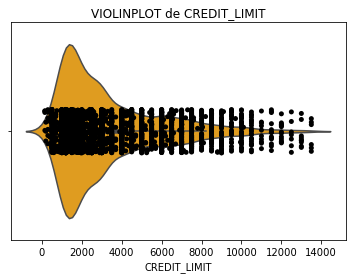

<AxesSubplot:xlabel='PAYMENTS'>

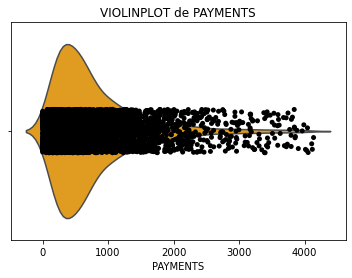

<AxesSubplot:xlabel='MINIMUM_PAYMENTS'>

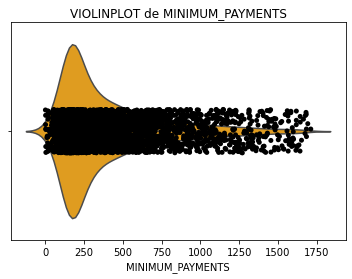

<AxesSubplot:xlabel='PRC_FULL_PAYMENT'>

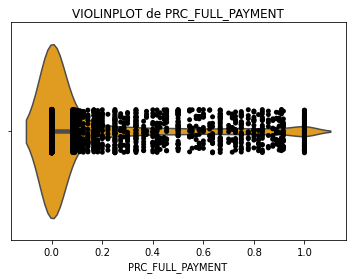

<AxesSubplot:xlabel='TENURE'>

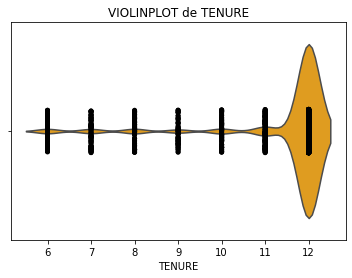

In [307]:
#Limpieza de outliers
lower =[]
upper =[]
for i in df.columns:
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    # print(IQR)
    lower_limit = df[i].quantile(0.25) - 1.5*IQR
    lower.append(lower_limit)
    upper_limit = df[i].quantile(0.75) + 1.5*IQR
    upper.append(upper_limit)
    
df_filtered = df[(df['BALANCE']>lower[0]) & (df['BALANCE']<upper[0]) 
& (df['BALANCE_FREQUENCY']>lower[1]) & (df['BALANCE_FREQUENCY']<upper[1]) 
& (df['PURCHASES']>lower[2]) & (df['PURCHASES']<upper[2]) 
& (df['ONEOFF_PURCHASES']>lower[3]) & (df['ONEOFF_PURCHASES']<upper[3]) 
& (df['INSTALLMENTS_PURCHASES']>lower[4]) & (df['INSTALLMENTS_PURCHASES']<upper[4]) 
& (df['CASH_ADVANCE']>lower[5]) & (df['CASH_ADVANCE']<upper[5]) 
& (df['CASH_ADVANCE_FREQUENCY']>lower[9]) & (df['CASH_ADVANCE_FREQUENCY']<upper[9]) 
& (df['CASH_ADVANCE_TRX']>lower[10]) & (df['CASH_ADVANCE_TRX']<upper[10]) 
& (df['PURCHASES_TRX']>lower[11]) & (df['PURCHASES_TRX']<upper[11]) 
& (df['CREDIT_LIMIT']>lower[12]) & (df['CREDIT_LIMIT']<upper[12]) 
& (df['PAYMENTS']>lower[13]) & (df['PAYMENTS']<upper[13]) 
& (df['MINIMUM_PAYMENTS']>lower[14]) & (df['MINIMUM_PAYMENTS']<upper[14])
]

print(f"Nos queda un DataFrame con {df_filtered.shape[0]} observaciones.")

for i in df_filtered.columns:
    display(sns.violinplot(x=df_filtered[i],color='orange'))
    sns.stripplot(data=df_filtered, x=i,color = 'black')
    plt.title(f"VIOLINPLOT de {i}")
    plt.show()


In [308]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 0 to 8948
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4194 non-null   float64
 1   BALANCE_FREQUENCY                 4194 non-null   float64
 2   PURCHASES                         4194 non-null   float64
 3   ONEOFF_PURCHASES                  4194 non-null   float64
 4   INSTALLMENTS_PURCHASES            4194 non-null   float64
 5   CASH_ADVANCE                      4194 non-null   float64
 6   PURCHASES_FREQUENCY               4194 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4194 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4194 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4194 non-null   float64
 10  CASH_ADVANCE_TRX                  4194 non-null   int64  
 11  PURCHASES_TRX                     4194 non-null   int64  
 12  CREDIT

## K-Means:


### K-Means sin outliers (prácticamente la mitad de la data):

In [309]:
#Como se encuentran las columnas en diferentes escalas:
scaler = StandardScaler() #Creamos un objeto de la clase StandardScaler
scaled_features = scaler.fit_transform(df_filtered) #estandarización los datos (media 0, varianza 1)   

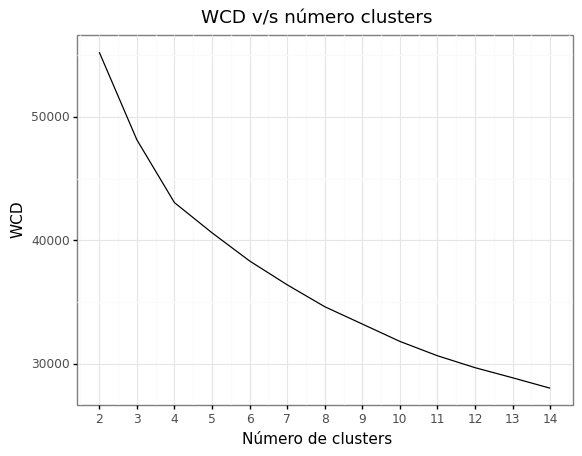

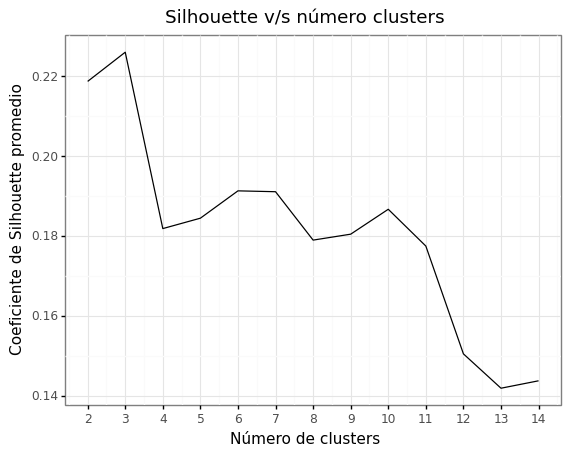

In [310]:
#Determinando número de K clusters:
maxK=15
sse = np.zeros(maxK-2) # NO USAR []
CS = np.zeros(maxK-2) # NO USAR []
for k in range(2, maxK):
    kmeans = KMeans(n_clusters=k,random_state=1,n_init=10)
    kmeans.fit(scaled_features)
    sse[k-2]=kmeans.inertia_ #NO USAR sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
    CS[k-2]=silhouette_avg #NO USAR CS.append(silhouette_avg)
    
#Generating the dataframa
tempData=pd.DataFrame(range(2, maxK),columns=["K"])
tempData["sse"]=sse
tempData["CS"]=CS
print(ggplot(tempData)+aes(x="K",y="sse")+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
+scale_x_continuous(breaks=range(1,maxK))+ggtitle("WCD v/s número clusters"))

print(ggplot(tempData)+aes(x="K",y="CS")+theme_bw()+geom_line()+labs(x="Número de clusters",y="Coeficiente de Silhouette promedio")
+scale_x_continuous(breaks=range(1,maxK))+ggtitle("Silhouette v/s número clusters"))    


Observando el metodo de silhouette logramos determinar que el numero de clusters es de 3.


In [311]:
#Aplicando el número de clusters seleccionado
selectedCluster=3
kmeans = KMeans(n_clusters=selectedCluster,n_init=10,random_state=1)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=1)

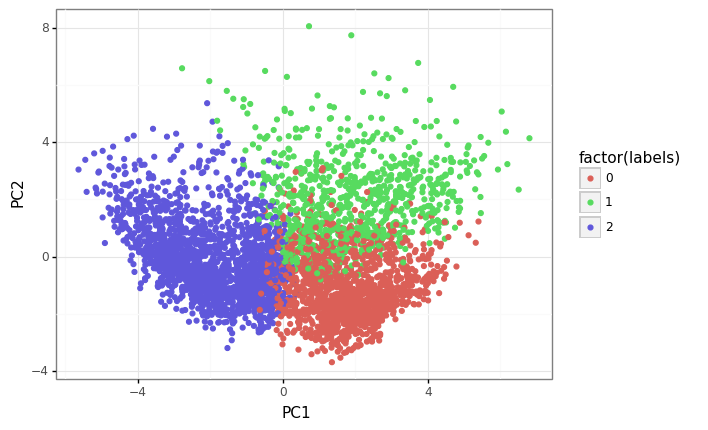

<ggplot: (113307777931)>

In [312]:
#Creando el objeto y aplicando PCA
pca = PCA(n_components=2)
pca.fit(scaled_features)
tempData = pca.transform(scaled_features)
tempData = pd.DataFrame(tempData,columns=["PC1","PC2"])
tempData["labels"]=kmeans.labels_
tempData
ggplot(tempData)+aes(x="PC1",y="PC2",color="factor(labels)")+geom_point(show_legend=True)+theme_bw()

Se pueden diferenciar claramente 3 clusters utilizando PCA. A continuación se verá qué características influyen en la asignación de los valores a los clusters.

### K-means con outliers (totalidad de la data):

In [313]:
#Como se encuentran las columnas en diferentes escalas:
scaler = StandardScaler() #Creamos un objeto de la clase StandardScaler
scaled_features = scaler.fit_transform(df) #estandarización los datos (media 0, varianza 1)  

In [314]:
promedio_hopkins =((1-hopkins(scaled_features,8950))+(1-hopkins(scaled_features,6950))+(1-hopkins(scaled_features,4950))
+(1-hopkins(scaled_features,2950))+(1-hopkins(scaled_features,950)))/5
promedio_hopkins
print(f"El estadístico de Hopkins promedio probando distintos tamaños de muestras (tamaño = P) es {promedio_hopkins}")

El estadístico de Hopkins promedio probando distintos tamaños de muestras (tamaño = P) es 0.9654815219584872


Como el valor es cercano a 1, es razonable pensar que utilizar un algoritmo de clustering como K-means será altamente efectivo, pues los datos se encuentran altamente clusterizados. Es necesario notar que se podría obtener un valor de Hopkins promedio más estadísticamente signiticativo si se calculara este con una mayor variedad de valores P y con una cantidad mayor de muestras por valor P.

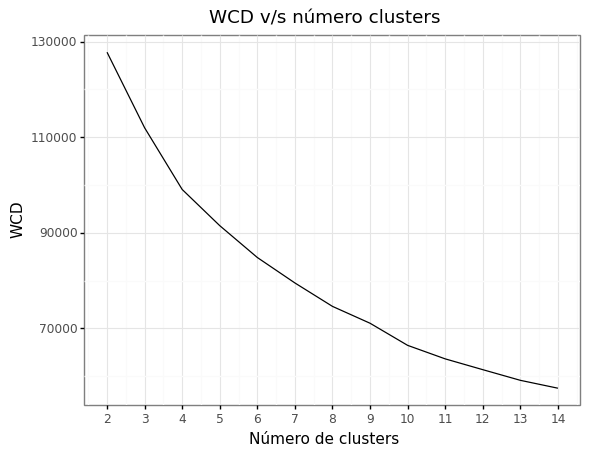

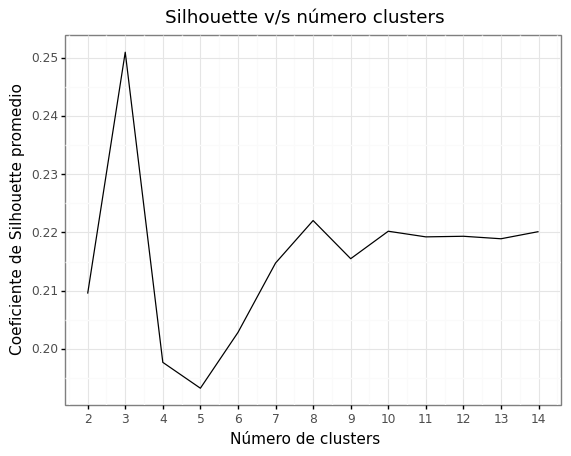

In [315]:
#Determinando número de K clusters:
maxK=15
sse = np.zeros(maxK-2) # NO USAR []
CS = np.zeros(maxK-2) # NO USAR []
for k in range(2, maxK):
    kmeans = KMeans(n_clusters=k,random_state=1,n_init=10)
    kmeans.fit(scaled_features)
    sse[k-2]=kmeans.inertia_ #NO USAR sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
    CS[k-2]=silhouette_avg #NO USAR CS.append(silhouette_avg)
    
#Generating the dataframa
tempData=pd.DataFrame(range(2, maxK),columns=["K"])
tempData["sse"]=sse
tempData["CS"]=CS
print(ggplot(tempData)+aes(x="K",y="sse")+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
+scale_x_continuous(breaks=range(1,maxK))+ggtitle("WCD v/s número clusters"))

print(ggplot(tempData)+aes(x="K",y="CS")+theme_bw()+geom_line()+labs(x="Número de clusters",y="Coeficiente de Silhouette promedio")
+scale_x_continuous(breaks=range(1,maxK))+ggtitle("Silhouette v/s número clusters"))    


Utilizando Silhouette se concluye nuevamente que el número óptimo de clusters es 3.

In [316]:
#Aplicando el número de clusters seleccionado
selectedCluster=3
kmeans = KMeans(n_clusters=selectedCluster,n_init=10,random_state=1)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=1)

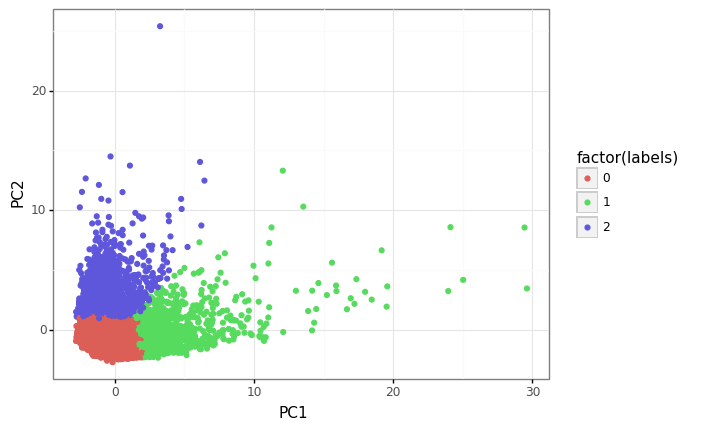

<ggplot: (113307798989)>

In [317]:
#Creando el objeto y aplicando PCA
pca = PCA(n_components=2)
pca.fit(scaled_features)
tempData = pca.transform(scaled_features)
tempData = pd.DataFrame(tempData,columns=["PC1","PC2"])
tempData["labels"]=kmeans.labels_
tempData
ggplot(tempData)+aes(x="PC1",y="PC2",color="factor(labels)")+geom_point(show_legend=True)+theme_bw()

Se pueden diferenciar claramente 3 clusters utilizando PCA, lo que puede sugerir que la clusterización fue exitosa. A continuación se verá qué características (atributos) influyen en la asignación de los valores a los clusters.

## K-means evaluación:

C:\Users\josei\AppData\Local\Temp/ipykernel_2324/249659128.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


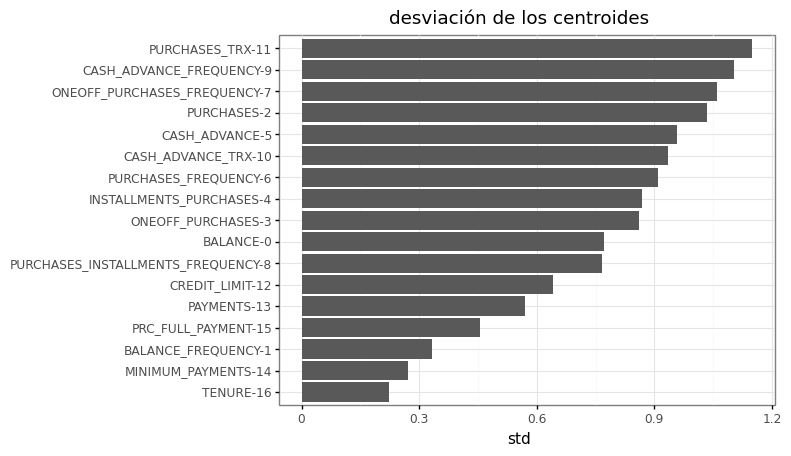

<ggplot: (113308377128)>

In [318]:
KMcentroids=pd.DataFrame(kmeans.cluster_centers_,columns=df.columns)
tempDF=pd.DataFrame(KMcentroids.std(),columns=["std"])
tempDF["varNames"]=df.columns

for i in range(len(tempDF["varNames"])):
    tempDF["varNames"][i] += "-"+str(i)
orderVar=tempDF.sort_values("std")["varNames"]

(ggplot(tempDF)
 +aes(y="std",x="varNames")
 +theme_bw()
 +geom_col()
 +scale_x_discrete(limits=orderVar)
 +coord_flip()
 +labs(title="desviación de los centroides",x="")
)

Analizando la desviación estándar de los centroides es posible concluir (no afirmar) que las características que más afectan en la asignación de clusters son la cantidad de CASH_ADVANCE_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY y PURCHASES_TRX. Con lo que se infiere que la segmentación o separación de clientes se ve más afectada por estas variables. Para analizar o verificar esto más a fondo, se procede a analizar los centroides por cluster y por variable con los siguientes gráficos de bigote:

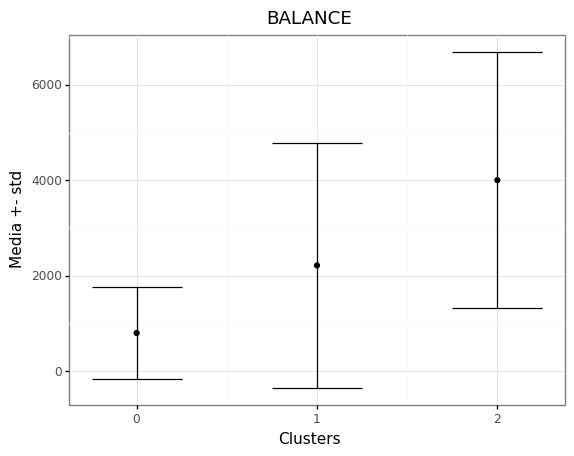

<ggplot: (113307944533)>

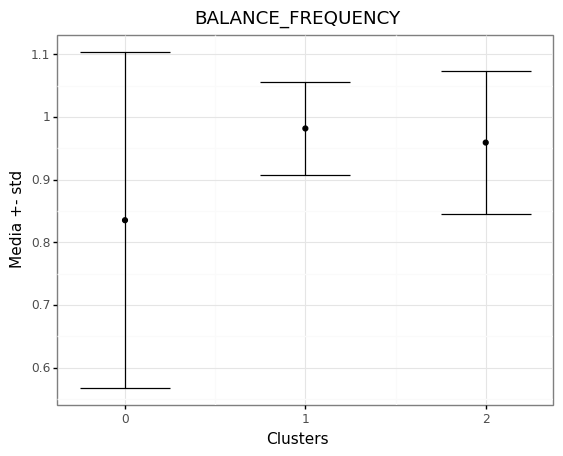

<ggplot: (113302376798)>

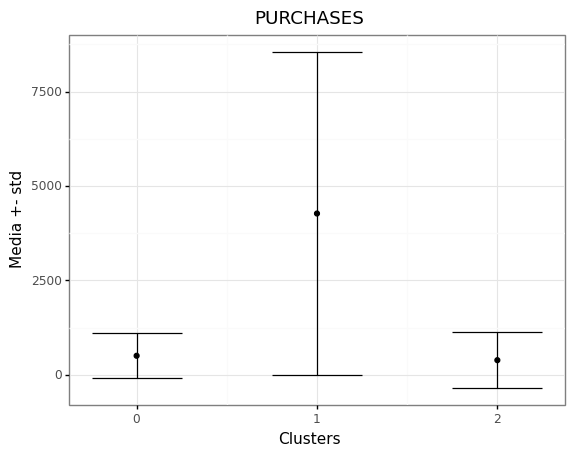

<ggplot: (113303389088)>

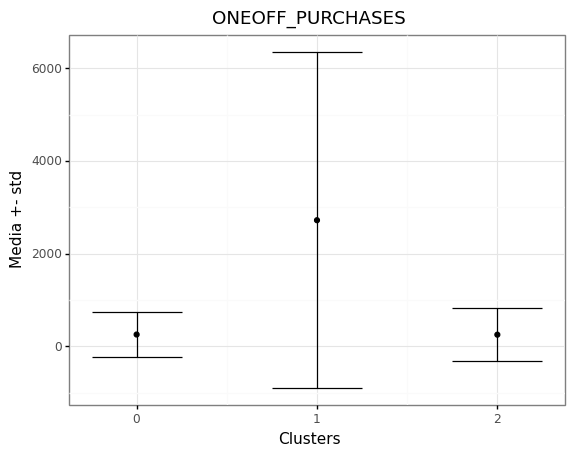

<ggplot: (113302692825)>

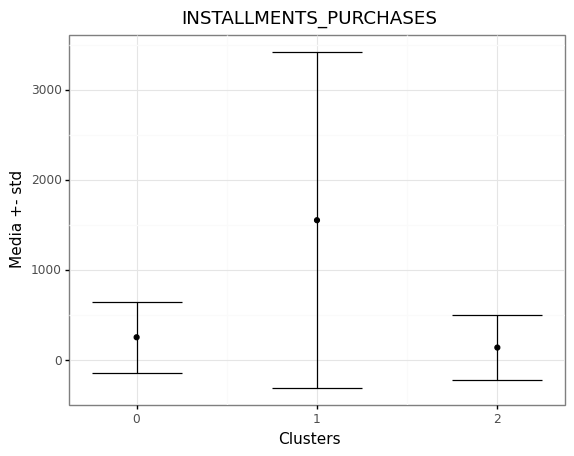

<ggplot: (113307824189)>

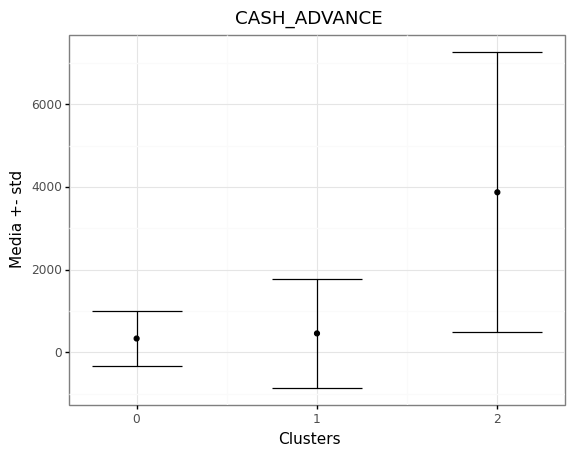

<ggplot: (113302897168)>

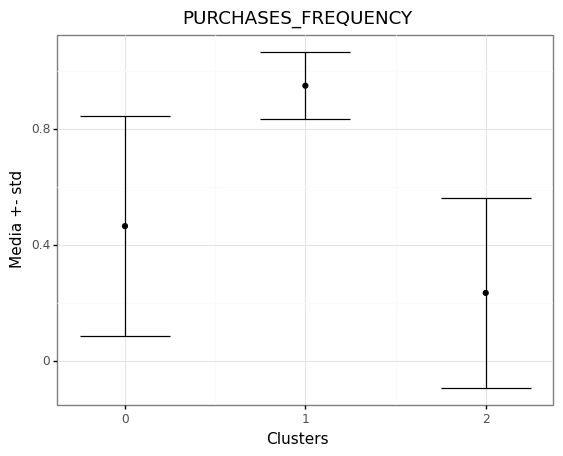

<ggplot: (113302883488)>

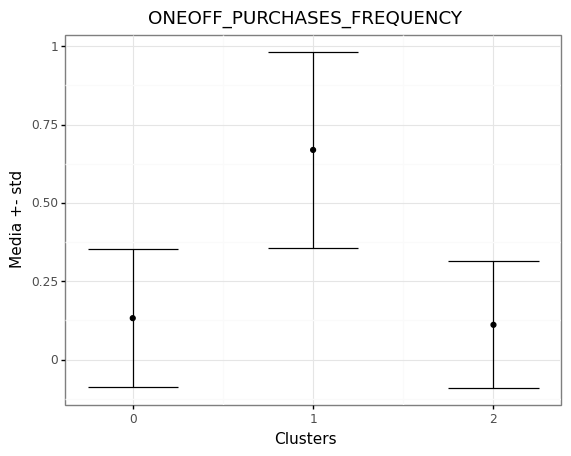

<ggplot: (113307771959)>

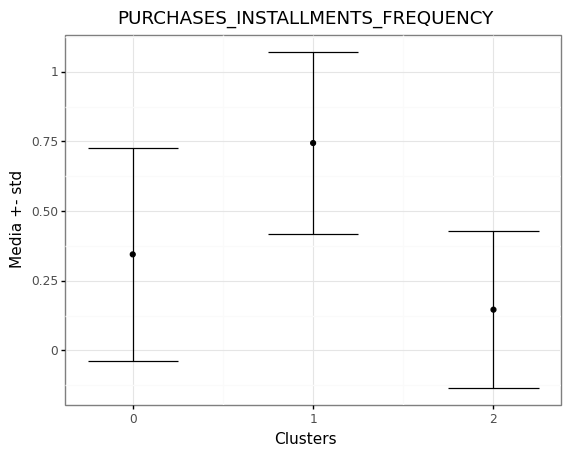

<ggplot: (113307383592)>

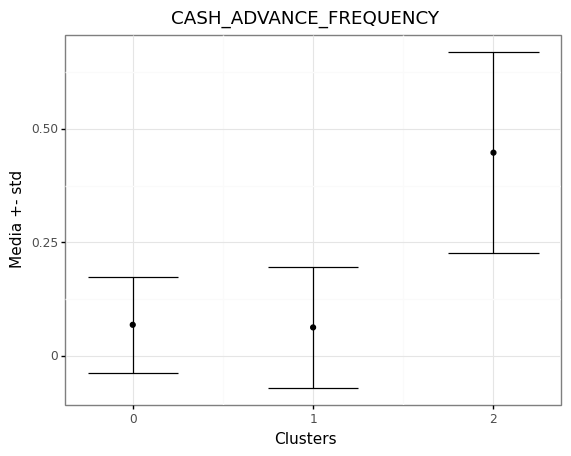

<ggplot: (113307355257)>

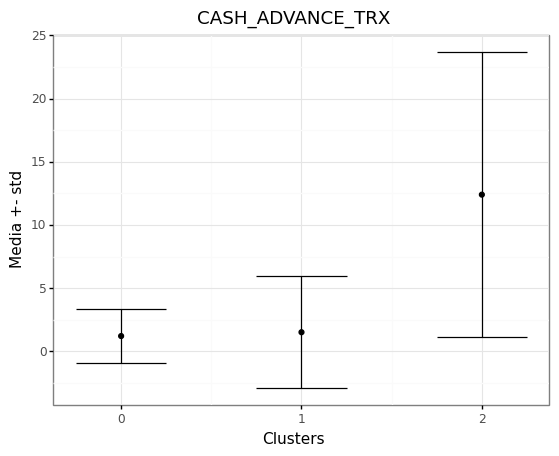

<ggplot: (113305962542)>

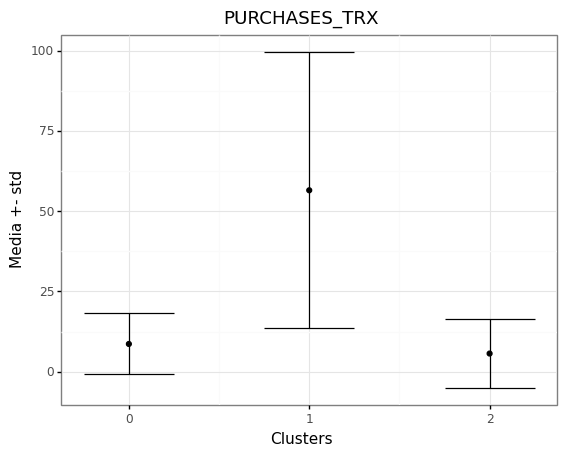

<ggplot: (113308086525)>

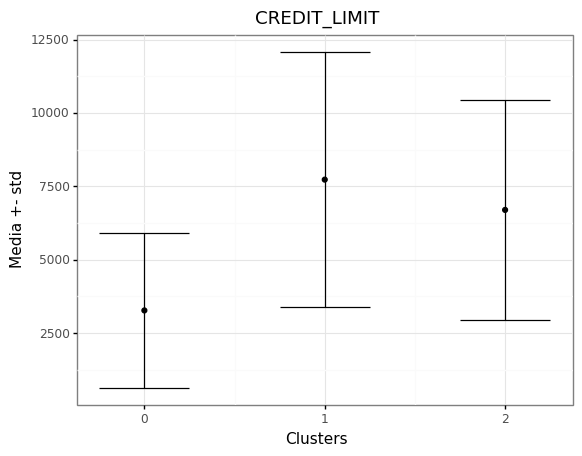

<ggplot: (113304523903)>

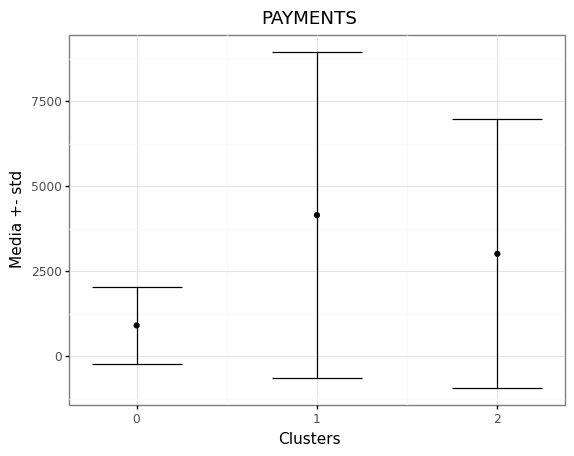

<ggplot: (113303184571)>

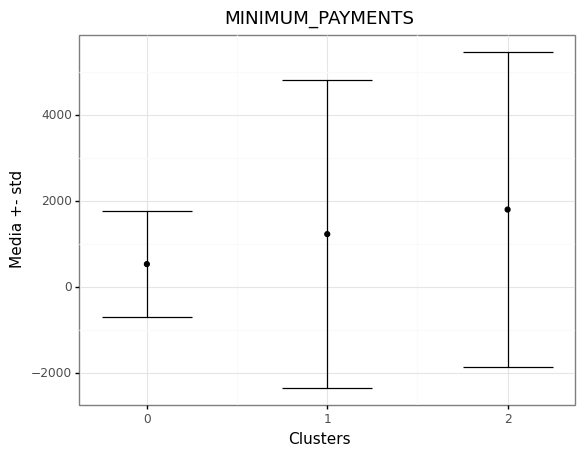

<ggplot: (113307451760)>

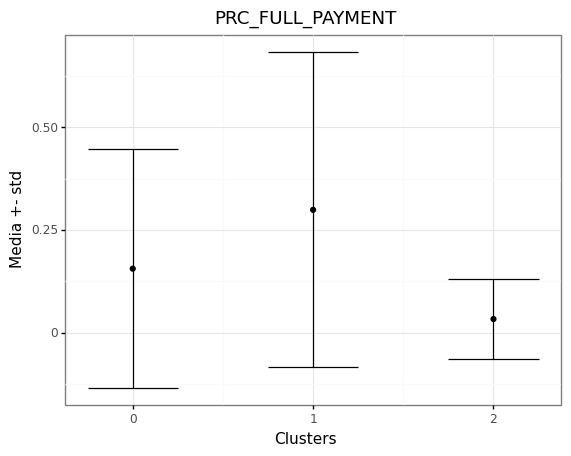

<ggplot: (113308240713)>

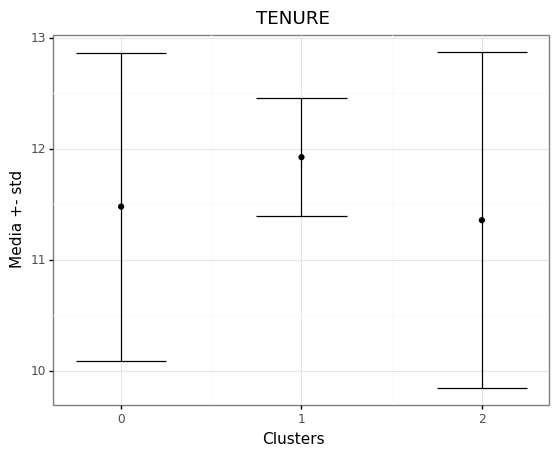

<ggplot: (113307832983)>

In [319]:
df_arr = df.to_numpy()

for i in range(17):
    #Analizando la variable que queremos ver
    varToAnalyze=i
    tempDF = pd.DataFrame(np.zeros(shape=(kmeans.n_clusters,2)),columns = ["mean","std"])
    for i in range(kmeans.n_clusters):
        tempDF["mean"][i]=df_arr[kmeans.labels_==i,varToAnalyze].mean()
        tempDF["std"][i]=df_arr[kmeans.labels_==i,varToAnalyze].std()
    

    #Crenado el gráfico
    display((ggplot(tempDF)
    +aes(x=range(kmeans.n_clusters),y="mean",ymin="mean-std",ymax="mean+std")
    +theme_bw()
    +geom_errorbar()
    +geom_point()
    +scale_x_continuous(breaks=range(kmeans.n_clusters))
    +labs(x="Clusters",y="Media +- std",title=df.columns[varToAnalyze])
    ))

BALANCE: El cluster 0 tiene una menor media y desviación estándar de BALANCE con respecto a los otros dos clusters, por lo que se puede concluir que en el cluster 0 están los clientes con menor BALANCE. Siendo la media y desviación estándar entre cluster 1 y 2 similares.

BALANCE_FREQUENCY: El cluster 0 tiene mayor media y desviación estándar de BALANCE_FREQUENCY respecto a los otros dos clusters, por lo que se puede concluir que en el cluster 0 están los clientes con gran BALANCE_FREQUENCY. Siendo la media y desviación estándar entre cluster 1 y 2 similares.

PURCHASES: El cluster 1 tiene mayor media y desviación estándar de PURCHASES respecto a los otros dos clusters, por lo que se puede concluir que en el cluster 1 están los clientes con mayor PURCHASES. Siendo la media y desviación estándar entre cluster 0 y 2 similares.

ONEOFF_PURCHASES: El cluster 1 tiene una mayor media y desviación estándar de ONEOFF_PURCHASES con respecto a los otros dos clusters, por lo que se puede concluir que en el cluster 0 están los clientes con mayor ONEOFF_PURCHASES. Siendo la media y desviación estándar entre cluster 0 y 2 similares.

INSTALLMENTS_PURCHASES: El cluster 1 tiene mayor media y desviación estándar de INSTALLMENTS_PURCHASES con respecto a los otros dos clusters, por lo que se puede concluir que en el cluster 1 están los clientes con mayor INSTALLMENTS_PURCHASES. Siendo la media y desviación estándar entre cluster 0 y 2 similares.

CASH_ADVANCE: El cluster 2 tiene mayor media y desviación estándar de CASH_ADVANCE con respecto a los otros dos clusters, por lo que se puede concluir que en el cluster 1 están los clientes con mayor CASH_ADVANCE. Siendo la media y desviación estándar entre cluster 0 y 1 similares.

PURCHASES_FREQUENCY: El cluster 1 tiene una mayor media y una menor desviación estándar de PURCHASES_FREQUENCY con respecto a los otros dos clusters. Siendo la desviación estándar y media entre el cluster 0 y 2 similares.

ONEOFF_PURCHASES_FREQUENCY: El cluster 1 tiene una mayor media y una desviación estándar similar de ONEOFF_PURCHASES _FREQUENCY con respecto al cluster 0 y al cluster 2. Siendo los otros dos clusters muy similares entre sí.

PURCHASES_INSTALLEMNTS_FREQUENCY: El cluster 1 tiene una mayor media que el cluster 0 y el cluster 0 tiene una mayor media que el cluster 2, teniendo los tres desviaciones estándar similares. Luego, en forma descendente tenemos al cluster 1, 0 y 2 respecto a la cantidad de PURCHASES_INSTALLMENTS_FREQUENCY.

CASH_ADVANCE_FREQUENCY: El cluster 2 presenta una mayor media y desviación estándar que los otros dos clusters, los cuales son similares entre sí. Luego, el cluster 2 presenta la mayor cantidad de CASH_ADVANCE_FREQUENCY.

CASH_ADVANCE_TRX: El cluster 2 presenta una mayor media y desviación estándar que los otros dos clusters, los cuales son similares entre sí. Luego, el cluster 2 presenta la mayor cantidad de CASH_ADVANCE_TRX.

PURCHASES_TRX: El cluster 1 presenta una mayor media y desviación estándar que los otros dos clusters, los cuales son similares entre sí. Luego el cluster 1 presenta la mayor cantidad de PURCHASES_TRX.

CREDIT_LIMIT: El cluster 0 presenta una menor media y desviación estándar que los otros dos los clusters, los cuales son similares entre sí. Luego, el cluster 0 presenta la menor cantidad de CREDIT_LIMIT.

PAYMENTS: El cluster 0 presenta una menor media y desviación estándar que los otros dos clusters, los cuales son similares entre sí. Luego, el cluster 0 presenta la menor cantidad de PAYMENTS.

MINIMUM_PAYMENTS: Los tres clusters presentan unas medias parecidas entre sí, la mayor diferencia es que la desviación estándar del cluster 0 es menor que la de los otros clusters, las cuales son similares entre sí.

PRC_FULL_PAYMENT: El cluster 2 es el que presenta menor media y desviación estándar de los 3 clusters, siendo los otros dos clusters más parecidos entre sí.

TENUER: El cluster 1 presenta mayor media y menor desviación estándar de los 3 clusters, siendo los otros dos clusters más parecidos entre sí.

CONCLUSIÓN RESPECTO A CADA CLUSTER:

CLUSTER 0 : Clientes con poco BALANCE, alta BALANCE_FREQUENCY, bajo CREDIT_LIMIT y bajo PAYMENTS.

Esto es, son clientes cuyo balance es bajo y que cambia con frecuencia a lo largo del tiempo, además de tener poco límite de crédito y un monto pequeño de pagos realizados. Se podría decir que son clientes poco activos y quizás no muy pudientes económicamente.

Cluster 1 : Clientes con alto PURCHASES, ONEOFF_PURCHASES, INSTALLEMNTS_PURCHASES, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASE_INSTALLMENTS_FREQUENCY, PURCHASES_TRX y TENURE.

Esto es, son clientes con un alto monto gastado en compras, quienes son los que más tienden a comprar (en cuotas, o bien, a contado). Son además los que tienen mayor antiguedad (TENURE). Se podría decir que son los clientes "veteranos" que más han usado y tienden a usar su tarjeta de crédito.

Cluster 2 : Clientes con alto CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX y poco PRC_FULL_PAYMENT.

Clientes que tienden a usar "adelantos de efectivo", quienes son los que menos han pagado lo que deben.